In [4]:
import os
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
path = "/content/drive/My Drive/2020 Spring/NLU/Project/NLU_Project/SummQG/Fine-tuning_GPT-2_for_QG"
file_path = os.path.join(path,"summaries.csv")
output_path = "/content/drive/My Drive/2020 Spring/NLU/Project/NLU_Project/SummQG/data/narrativeqa"

In [0]:
data = pd.read_csv(file_path)
data = data[data["set"]=="test"]

In [0]:
sent_tokenize(data.summary[0])

[" Mark Hunter (Slater), a high school student in a sleepy suburb of Phoenix, Arizona, starts an FM pirate radio station that broadcasts from the basement of his parents' house.",
 'Mark is a loner, an outsider, whose only outlet for his teenage angst and aggression is his unauthorized radio station.',
 'His pirate station\'s theme song is "Everybody Knows" by Leonard Cohen and there are glimpses of cassettes by such alternative musicians as The Jesus and Mary Chain, Camper Van Beethoven, Primal Scream, Soundgarden, Ice-T, Bad Brains, Concrete Blonde, Henry Rollins, and The Pixies.',
 'By day, Mark is seen as a loner, hardly talking to anyone around him; by night, he expresses his outsider views about what is wrong with American society.',
 'When he speaks his mind about what is going on at his school and in the community, more and more of his fellow students tune in to hear his show.',
 'Nobody knows the true identity of "Hard Harry" or "Happy Harry Hard-on," as Mark refers to himself

In [0]:
data["sentencized"] = data["summary"].apply(sent_tokenize)

In [8]:
data.head()

,document_id,set,summary,summary_tokenized,sentencized
0,0025577043f5090cd603c6aea60f26e236195594,test,"Mark Hunter (Slater), a high school student i...","Mark Hunter ( Slater ) , a high school student...","[ Mark Hunter (Slater), a high school student ..."
7,014de1a8802c05ff64efa047e9290fb7fccea2b4,test,"Maskull, a man longing for adventures, accept...","Maskull , a man longing for adventures , accep...","[ Maskull, a man longing for adventures, accep..."
10,019a9611dd8e1b822bd0a58f075cc4a30bdd0797,test,"The story follows its title heroine, from chi...","The story follows its title heroine , from chi...","[ The story follows its title heroine, from ch..."
15,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,[ Frankie Ryan works as a page boy at a radio ...
19,0269408ac78193a0e13f1033bec6f658b00437b3,test,The film is a postmodern spoof that tells the...,The film is a postmodern spoof that tells the ...,[ The film is a postmodern spoof that tells th...


In [0]:
data["num_sent"] = data["sentencized"].apply(len)

In [0]:
data.to_csv(os.path.join(output_path,"test_sentencized.csv"),index=False)

In [10]:
data.num_sent.describe()

count    355.000000
mean      27.425352
std       11.169315
min        5.000000
25%       19.000000
50%       28.000000
75%       35.000000
max       65.000000
Name: num_sent, dtype: float64

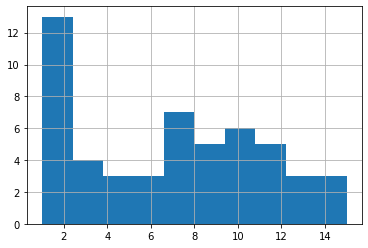

In [12]:
data.num_sent.groupby(data.num_sent).count().hist()

In [0]:
print(data.shape)
min_20 = data[data["num_sent"]>=20].reset_index(drop=True)
print(min_20.shape)

(355, 6)
(259, 6)


In [0]:
import random

In [0]:
random_seed = random.seed(100)
min_20["extracted"] = min_20["sentencized"].apply(random.sample, k=10)

In [0]:
min_20 = min_20.drop(["num_sent", "sentencized"],axis=1).explode("extracted")
min_20.to_csv(os.path.join(output_path,"random_extracted_10.csv"))

In [0]:
min_20.head()

,document_id,set,summary,summary_tokenized,extracted
0,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,When they try to help the station receptionist...
0,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,When Frankie and Jeff audition for a comedy sp...
0,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,When all the station executives are gathered i...
0,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,The station has financial problems related to ...
0,020773a0ca71155173ec4affe6a2496a6cb45216,test,Frankie Ryan works as a page boy at a radio s...,Frankie Ryan works as a page boy at a radio st...,Frankie soon finds the weapon used to shoot Ri...
